**Importing the needed libraries**

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Loading the dataset into a dataframe "iris_data"**

In [386]:
file_path = "/content/Iris.csv"
iris_data = pd.read_csv(file_path)

**Checking for null values in the dataframe**

In [387]:
print(iris_data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


**Preprocessing the data**

In [388]:
print(iris_data.columns)                      # printing the columns names in order to determine which ones to keep and which to drop
iris_data = iris_data.drop(['Id'], axis = 1)  # as a result, id is not crucial for our dataset, and therefore should be elemented

print(iris_data.dtypes)                       # printing the type of each feature
print(iris_data['Species'].unique())          # since 'Species' column is of type object, we will numerize it using mapping conversion

species_mapping = {'Iris-versicolor': 1, 'Iris-setosa': 2 , 'Iris-virginica': 3}
iris_data['Species'] = iris_data['Species'].map(species_mapping)

print(iris_data.head(5))                      # printing the final result

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        2
1            4.9           3.0            1.4           0.2        2
2            4.7           3.2            1.3           0.2        2
3            4.6           3.1            1.5           0.2        2
4            5.0           3.6            1.4           0.2        2


**Shuffling the data in order to to make sure clustering is not affected by the ordering of this dataset**

In [389]:
print(iris_data.head(5))
iris_data = iris_data.sample(frac=1).reset_index(drop=True)
print(iris_data.head(5))

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        2
1            4.9           3.0            1.4           0.2        2
2            4.7           3.2            1.3           0.2        2
3            4.6           3.1            1.5           0.2        2
4            5.0           3.6            1.4           0.2        2
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.4           3.4            1.7           0.2        2
1            5.0           3.6            1.4           0.2        2
2            5.8           2.7            4.1           1.0        1
3            5.0           3.5            1.3           0.3        2
4            7.2           3.2            6.0           1.8        3


**Determining the optimal number of clusters using the elbow method**

In [390]:
inertia = []
for i in range(1, 16):
  KMeans_model = KMeans(n_clusters = i)
  KMeans_model.fit(iris_data)
  inertia.append(KMeans_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**N Clusters vs Inertia graph**

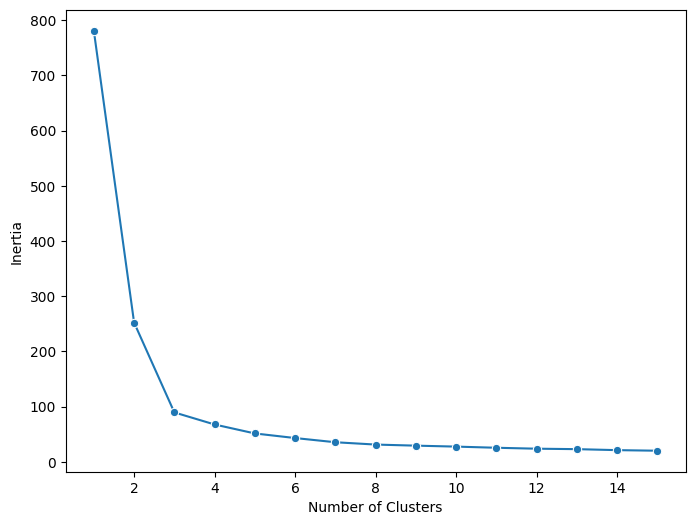

In [395]:
graphed_data = pd.core.frame.DataFrame()
graphed_data['Inertia'] = inertia                                                         # a dataframe instance just to hold the two columns that will be our x and y
graphed_data['Number of Clusters'] = range(1, 16)                                         # our x (Number of Clusters column)
plt.figure(figsize = (8, 6))                                                              # our y (Inertia column)
sns.lineplot(x = 'Number of Clusters', y = 'Inertia', data = graphed_data, marker = 'o')  # visualizing the result using a line plot and putting a circle at each value
plt.show()

**From the above graph it looks like the graph is getting stable at 3, which makes our k = 3**

**Clustering the data using KMeans algorithm**

In [392]:
final_model = KMeans(n_clusters = 3)      # creating the model with our number of clusters (3)
final_model.fit(iris_data)                # fitting data into the model - clustering
predictions = final_model.labels_         # getting the clustering labels of each row at the dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Clustering Visualisation**

[1 1 0 1 2 1 1 1 2 1 0 0 0 1 1 2 2 1 0 1 0 0 0 2 2 0 2 2 1 0 0 1 0 0 2 2 1
 1 0 0 0 1 2 0 0 0 0 0 1 1 2 1 1 1 0 1 0 2 2 2 2 0 1 1 1 1 1 0 1 2 0 2 1 2
 1 2 2 0 2 2 1 0 1 1 1 2 2 0 2 0 2 2 1 0 0 2 1 2 2 2 2 0 2 2 1 1 0 0 1 2 0
 2 1 1 2 2 1 0 2 1 0 2 2 1 0 0 0 0 2 2 2 0 2 1 0 0 1 2 2 2 0 1 0 1 0 1 1 2
 0 0]


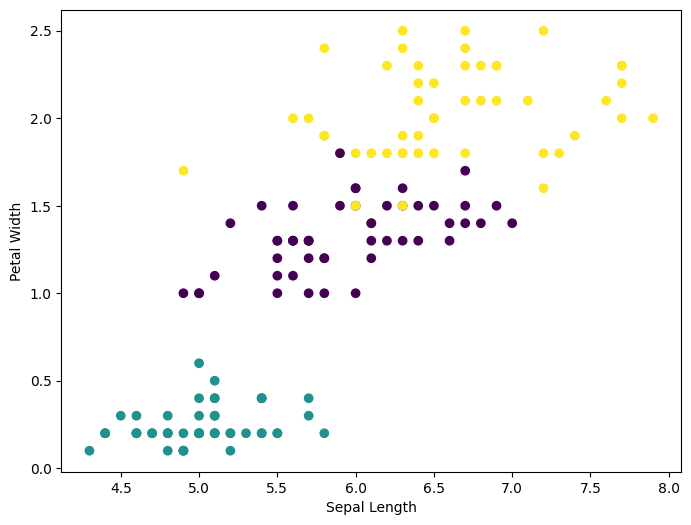

------------------------------------------------------------------------------------------


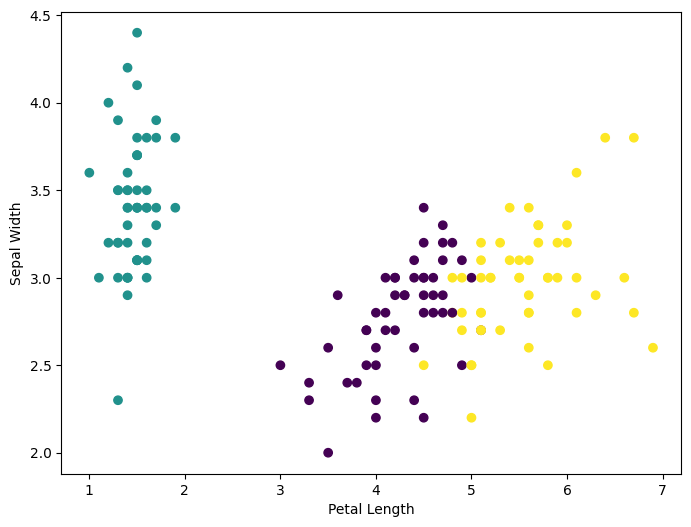

In [393]:
print(predictions)

# between the two features
plt.figure(figsize = (8, 6))
plt.scatter(iris_data['SepalLengthCm'], iris_data['PetalWidthCm'], c= predictions)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.show()
print("------------------------------------------------------------------------------------------")   # a separator between the two graphs

# between the other two features
plt.figure(figsize = (8, 6))
plt.scatter(iris_data['PetalLengthCm'], iris_data['SepalWidthCm'], c= predictions)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Width")
plt.show()

**Evaluating our clustering model using silhouette coefficient**

In [394]:
print(silhouette_score(iris_data, predictions))

0.6642551697366202
